In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rtas = pd.read_csv("Analisis-taller-de-soporte-informático-_respuestas_.csv",sep=",",engine="python")
del rtas["Marca temporal"]


## ¿Cuáles son las razones por las que el alumno considera que no ha entregado todos los trabajos?


- ### ¿Tendrá que ver con el lenguaje de programación?¿Cuántos odian python?

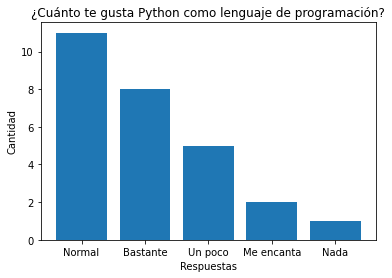

In [58]:
valoresX=rtas["¿Cuánto te gusta Python como lenguaje de programación?"].unique()
valoresY=rtas["¿Cuánto te gusta Python como lenguaje de programación?"].value_counts().tolist()

plt.bar(valoresX,valoresY)
plt.title('¿Cuánto te gusta Python como lenguaje de programación?')
plt.xlabel('Respuestas')
plt.ylabel('Cantidad')
plt.show()

##### Con este gráfco podemos ver que a la mayoria (17 de 27) de los alumnos que respondieron la encuesta se encuentran en el grupo de los que no les agrada ni les disgusta python, los que les gusta solo un poco o los que no les gusta nada.

##### Ahora veamos las demás respuestas de este grupo relacionadas con el análisis de datos y la realización de las tareas

[27.272727272727273, 40.0, 100.0]


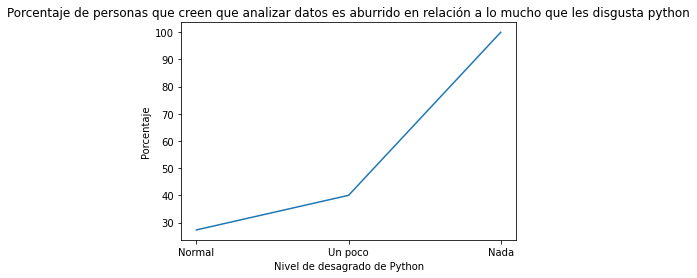

In [59]:
def calcularPorcentaje(totalidad,cantidad):
    return((cantidad*100)/totalidad)

pythonNormal=rtas[(rtas["¿Cuánto te gusta Python como lenguaje de programación?"]=="Normal")]
pythonPoco=rtas[(rtas["¿Cuánto te gusta Python como lenguaje de programación?"]=="Un poco")]
pythonNada=rtas[(rtas["¿Cuánto te gusta Python como lenguaje de programación?"]=="Nada")]

siNormal=pythonNormal["¿Considerás que analizar datos es aburrido?"].value_counts().tolist()
siPoco=pythonPoco["¿Considerás que analizar datos es aburrido?"].value_counts().tolist()
siNada=pythonNada["¿Considerás que analizar datos es aburrido?"].value_counts().tolist()

valoresX=["Normal","Un poco","Nada"]
listaSi=[calcularPorcentaje(len(pythonNormal),siNormal[1]),calcularPorcentaje(len(pythonPoco),siPoco[1]),calcularPorcentaje(len(pythonNada),siNada[0])]

print(listaSi)
plt.plot(valoresX,listaSi)
plt.title('Porcentaje de personas que creen que analizar datos es aburrido en relación a lo mucho que les disgusta python')
plt.xlabel('Nivel de desagrado de Python')
plt.ylabel('Porcentaje')
plt.show()

##### En este gráfico podemos apreciar que el porcentaje de alumnos que consideran que analizar datos con python es aburrido de cada grupo aumenta en relación a su nivel de disgusto por el lenguaje

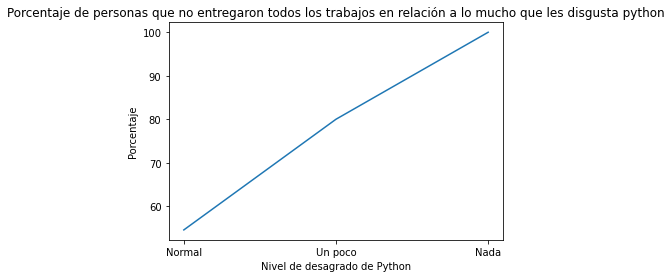

In [60]:
noEntregoNormal=pythonNormal[pythonNormal["¿Pudo entregar todos los trabajos de la materia?"]=="No"]
noEntregoPoco=pythonPoco[pythonPoco["¿Pudo entregar todos los trabajos de la materia?"]=="No"]
noEntregoNada=pythonNada[pythonNada["¿Pudo entregar todos los trabajos de la materia?"]=="No"]

listaNo=[calcularPorcentaje(len(pythonNormal),len(noEntregoNormal)),calcularPorcentaje(len(pythonPoco),len(noEntregoPoco)),calcularPorcentaje(len(pythonNada),len(noEntregoNada))]
plt.plot(valoresX,listaNo)
plt.title('Porcentaje de personas que no entregaron todos los trabajos en relación a lo mucho que les disgusta python')
plt.xlabel('Nivel de desagrado de Python')
plt.ylabel('Porcentaje')
plt.show()

##### El resultado de este último cuadro demuestra que los grupos de alumnos a los que menos les gusta Python más tienden a no entregar los trabajos.
##### Analizando los tres cuadros podemos llegar a la conclusión de que el gusto por python afectó en la entrega de trabajos.

- ### ¿Tendrá que ver con el horario?¿Cuántos consideran que su rendimiento en las primeras horas de la mañana es menor que en la tarde?

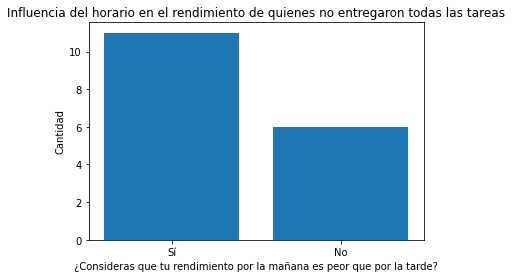

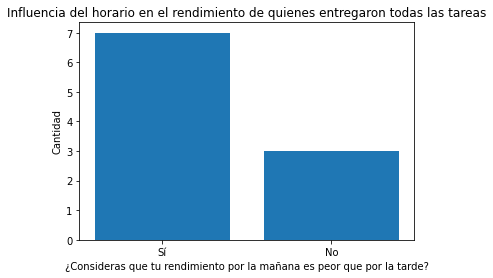

In [61]:
cantidad = rtas['¿Pudo entregar todos los trabajos de la materia?'].value_counts().tolist()
rendimiento = rtas["¿Consideras que tu rendimiento por la mañana es peor que por la tarde?"].unique()

TTN=rtas[rtas["¿Pudo entregar todos los trabajos de la materia?"]=="No"]
TTY=rtas[rtas["¿Pudo entregar todos los trabajos de la materia?"]=="Sí"]

cantN=TTN["¿Consideras que tu rendimiento por la mañana es peor que por la tarde?"].value_counts().tolist()
cantY=TTY["¿Consideras que tu rendimiento por la mañana es peor que por la tarde?"].value_counts().tolist()

plt.bar(rendimiento,cantN)
plt.title('Influencia del horario en el rendimiento de quienes no entregaron todas las tareas')
plt.xlabel('¿Consideras que tu rendimiento por la mañana es peor que por la tarde?')
plt.ylabel('Cantidad')
plt.show()

plt.bar(rendimiento,cantY)
plt.title('Influencia del horario en el rendimiento de quienes entregaron todas las tareas')
plt.xlabel('¿Consideras que tu rendimiento por la mañana es peor que por la tarde?')
plt.ylabel('Cantidad')
plt.show()

##### A partir de los resultados que muestran estos dos cuadros podemos concluir que la influencia del horario sobre el rendimiento de los alumnos no tiene relación con la entrega de trabajos, ya que tanto como los que no entregaron todas las tareas como los que sí respondieron en su mayoría que su rendimiento por la mañana es peor que por la tarde.



- ### ¿Tendrá que ver con los contenidos?¿Cuántos consideran que analizar datos es aburrido?

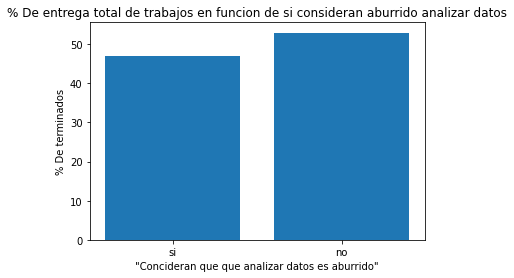

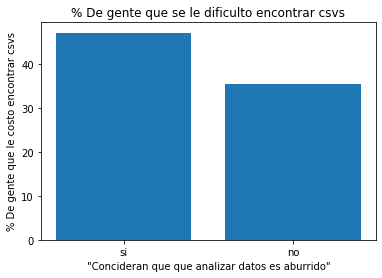

In [62]:
data = pd.read_csv("Analisis-taller-de-soporte-informático-_respuestas_.csv",sep=",",engine="python")
data.columns = [column.replace(" ", "_") for column in data.columns]
data.columns = [column.replace("?", "_") for column in data.columns]
data.columns = [column.replace("�", "_") for column in data.columns]
data.columns = [column.replace("¿", "_") for column in data.columns]

data['_Considerás_que_analizar_datos_es_aburrido_'].replace(
    to_replace=['Sí', 'S�'],
    value='si',
    inplace=True
)
data['_Pudo_entregar_todos_los_trabajos_de_la_materia_'].replace(
    to_replace=['Sí', 'S�'],
    value='si',
    inplace=True
)


Resultados = []
Resultados2 = []
Opciones = ["si", "no"]
Opciones2 = ["si", "no"]
dfPython_Considerás_que_analizar_datos_es_aburrido_ = data.query('_Considerás_que_analizar_datos_es_aburrido_ == "No"')
Resultados.append((len(dfPython_Considerás_que_analizar_datos_es_aburrido_.query('_Pudo_entregar_todos_los_trabajos_de_la_materia_== "si"')) * 100) /  len(dfPython_Considerás_que_analizar_datos_es_aburrido_))
Resultados.append((len(dfPython_Considerás_que_analizar_datos_es_aburrido_.query('_Pudo_entregar_todos_los_trabajos_de_la_materia_== "No"')) * 100) /  len(dfPython_Considerás_que_analizar_datos_es_aburrido_))


plt.title('% De entrega total de trabajos en funcion de si consideran aburrido analizar datos')
plt.xlabel('"Concideran que que analizar datos es aburrido"')
plt.ylabel('% De terminados')
plt.bar(Opciones,Resultados)
plt.show()

dfDificilCSV = dfPython_Considerás_que_analizar_datos_es_aburrido_.query('_Pudo_entregar_todos_los_trabajos_de_la_materia_== "no"')
dfNODificilCSV = dfPython_Considerás_que_analizar_datos_es_aburrido_.query('_Pudo_entregar_todos_los_trabajos_de_la_materia_== "si"')

Resultados2.append((len(dfPython_Considerás_que_analizar_datos_es_aburrido_.query('_Se_te_dificultó_la_búsqueda_de_datasets__ == "Sí"')) * 100) /  len(dfPython_Considerás_que_analizar_datos_es_aburrido_))
Resultados2.append((len(dfNODificilCSV.query('_Se_te_dificultó_la_búsqueda_de_datasets__ == "Sí"')) * 100) /  len(dfPython_Considerás_que_analizar_datos_es_aburrido_))
plt.title('% De gente que se le dificulto encontrar csvs')
plt.xlabel('"Concideran que que analizar datos es aburrido"')
plt.ylabel('% De gente que le costo encontrar csvs')
plt.bar(Opciones,Resultados2)
plt.show()



##### Como podemos ver en el primer cuadro, quienes no consideran analizar datos con python aburrido tienen más porcentaje de personas que entregaron todos los trabajos que el grupo de quienes sí lo consideran aburrido.
##### Tambien podemos concluir que la gente a la que le parece aburrido analizar datos suele tener mas dificultad para encontrar archivos .csv.


- ### ¿Hasta qué mes del año se han entregado la mayoría los trabajos?


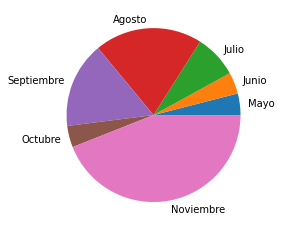

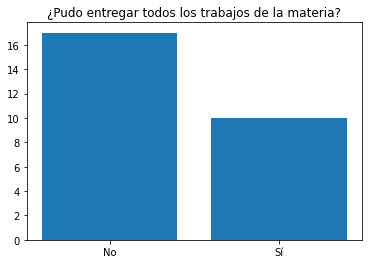

In [63]:
y = np.array([rtas["¿Hasta qué mes entregaste trabajos?"].value_counts()["Mayo"],
rtas["¿Hasta qué mes entregaste trabajos?"].value_counts()["Junio"],
rtas["¿Hasta qué mes entregaste trabajos?"].value_counts()["Julio"],
rtas["¿Hasta qué mes entregaste trabajos?"].value_counts()["Agosto"],
rtas["¿Hasta qué mes entregaste trabajos?"].value_counts()["Septiembre"],
rtas["¿Hasta qué mes entregaste trabajos?"].value_counts()["Octubre"],
rtas["¿Hasta qué mes entregaste trabajos?"].value_counts()["Noviembre"]])

mylabels = ["Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre"]
plt.pie(y, labels = mylabels)
plt.show()
mayor = 0
for i in range(len(y)):
    if y[i] > y[mayor] :
        mayor = i

trabajosTerminados=rtas["¿Pudo entregar todos los trabajos de la materia?"].value_counts().tolist()
trabajosTerminadosRtas=rtas["¿Pudo entregar todos los trabajos de la materia?"].unique()

plt.bar(trabajosTerminadosRtas,trabajosTerminados)
plt.title('¿Pudo entregar todos los trabajos de la materia?')
plt.show()

##### Se puede ver que la mayoría de los alumnos llegaron a entregar trabajos hasta el mes de noviembre. De todas maneras, la mayoría de los alumnos no entregaron todos los trabajos, lo que significa que deben tener trabajos pendientes de otros meses pero completaron el último correspondiente al mes de Noviembre.

- ### ¿Cuáles son los trabajos correspondientes a ese mes?


In [64]:
trabajos = pd.read_csv("trabajos.csv",sep=",",engine="python")
print(trabajos.loc[trabajos['mes'] == mylabels[mayor]])

    trabajo        mes  dia
10       11  Noviembre   11
